# Assignment

**Quentin Le Roux**

<hr>

This first part of the assignments is based on the iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Assignment 1.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# importing the data from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# extracting the relevant information
data = iris_dataset.data
data_feature_names = iris_dataset.feature_names
target = iris_dataset.target
target_names = iris_dataset.target_names

print('There are ' + str(len(data_feature_names)) + ' features, whose names are: \n' + str(data_feature_names))
print('\nThere are ' + str(len(target_names)) + ' classes to predict, whose names are: \n' + str(target_names))
print('\nThere are ' + str(data.shape[0]) + ' observations')

There are 4 features, whose names are: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

There are 3 classes to predict, whose names are: 
['setosa' 'versicolor' 'virginica']

There are 150 observations


$\mathbf{Exercise\, 1.}$ Compute the median, mean and standard deviation for each of the 4 features in the iris dataset (don't use numpy or other pre-defined functions, write your own routine).

In [3]:
def retrieve_feature(dataset, elem):
    """
    Isolates the elements of each feature
    """
    return [x[elem] for x in dataset]

def compute(dataset, dataset_names):
    """
    Computes the basic statistics of each feature
    """
    length = len(dataset)
    results = {}
    # Functions
    median = lambda lst: (lst[int(length/2)] + lst[int(length/2)+1])/2
    mean = lambda lst: sum(lst)/length
    std_deviation = lambda lst: mean((lst-mean(lst))**2)**(1/2)
    # IO
    for idx, name in enumerate(dataset_names):
        # Retrieve and sort feature
        feature = retrieve_feature(data, idx)
        sorted_feature = sorted(feature)
        # Records mean and std_dev
        mn = mean(feature)
        std_dev = std_deviation(feature)
        results[name] = [mn, std_dev]
        # Prints results
        print(f"Statistics on {dataset_names[idx]}:")
        print(f"Median: {round(median(sorted_feature),2)}")
        print(f"Mean: {round(mn,2)}")
        print(f"Standard Deviation: {round(std_dev,2)}\n")
    return results

In [4]:
results = compute(data, data_feature_names)

Statistics on sepal length (cm):
Median: 5.8
Mean: 5.84
Standard Deviation: 0.83

Statistics on sepal width (cm):
Median: 3.0
Mean: 3.06
Standard Deviation: 0.43

Statistics on petal length (cm):
Median: 4.4
Mean: 3.76
Standard Deviation: 1.76

Statistics on petal width (cm):
Median: 1.3
Mean: 1.2
Standard Deviation: 0.76



$\mathbf{Exercise\, 2.}$ For each feature, generate 150 Gaussian distributed samples with the same mean and standard_deviation computed in Exercise 1.

In [5]:
import random as rd

for k, v in results.items():
    # Clears old samples from results
    if len(results[k]) > 2: results[k] = results[k][:2]
    # Draws 150 samples
    print(f"Drawing samples for {k}")
    samples = []
    for _ in range(150): samples.append(rd.gauss(v[0], v[1]))
    results[k].append(samples)

Drawing samples for sepal length (cm)
Drawing samples for sepal width (cm)
Drawing samples for petal length (cm)
Drawing samples for petal width (cm)


$\mathbf{Exercise\, 3.}$ Compute the histogram (with 30 bins) of the distribution of the generate samples and plot it together with the histogram of the original data. The histograms must be plotted on the same plot. Comment on the difference between simulations and real data: for which feature the distributions are most different? What is the reason? 

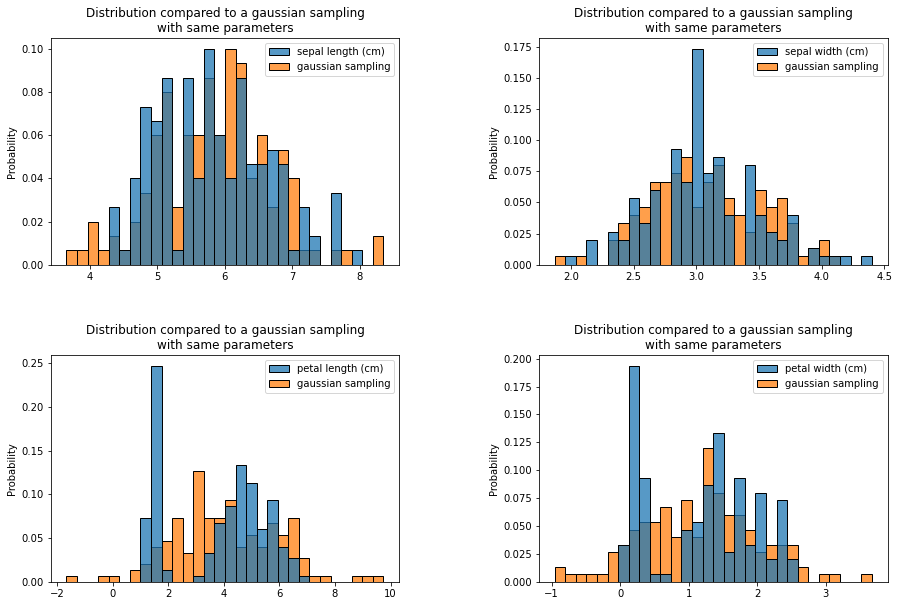

In [6]:
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(4):
    # Creates the dataframe to plot
    feature_data = retrieve_feature(data, i)
    gaussian_data = results[data_feature_names[i]][2]
    df = pd.DataFrame(list(zip(feature_data, 
                               gaussian_data)), 
                      columns=[data_feature_names[i], "gaussian sampling"])
    # Sets the plot
    title = 'Distribution compared to a gaussian sampling\nwith same parameters'
    ax = fig.add_subplot(2, 2, i+1)
    sns.histplot(ax=ax, 
                 data=df,
                 stat="probability",
                 bins=30, 
                 common_norm=False).set_title(title)

plt.show()

**<u>Comment</u>**

1. It seems that the Sepal Length and Sepal Width are gaussian distributed, as per the visual comparison with the gaussian sampling.

2. On the contrary, Petal Length and Petal Width have a distribution with two distinct groupings (for instance petal length concentrates around both 1.5 and 5). **We cannot say that Petal Length and Petal Width have a gaussian distribution**.

As such, there seems to be a different distribution pattern when data either relate to **petals** or **sepal**. It is likely that one or a few species of irises have a different petal characteristic, creating the groupings in the distribution that are showcased in the last two graphs.

$\mathbf{Exercise\, 4.}$ Estimate and plot the probability density function of the feature $\mbox{petal length (cm)}$.


Text(0.5, 1.0, 'Probability Density Function of Petal Length (cm)')

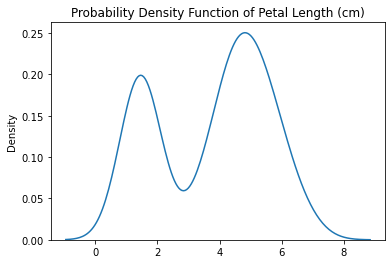

In [7]:
sns.kdeplot(retrieve_feature(data, 2)).set_title("Probability Density Function of Petal Length (cm)")

## Assigment 1.2

$\mathbf{Exercise\, 1.}$ Create a linear benchmark, where the dimension of the input data $X$ is 2, and the dimension of the output data $y$ is 1. Choose the amount of noise and sample size.

Evaluate the prediction metrics for the following regression methods:

- Linear regression
- Support Vector Regression with RBF kernel
- Decision Tree Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
def create_linear_data(input_dimensions, 
                       output_dimensions, 
                       n_samples, 
                       range_linear, 
                       range_intercept,
                       noise_level,
                       seed):
    """
    Create a linear dataset
    """
    np.random.seed(seed)
    
    x = np.random.randn(input_dimensions*n_samples).reshape(input_dimensions,
                                                            n_samples)
    A = np.random.randint(range_linear[0],
                          range_linear[1],
                          input_dimensions*output_dimensions).reshape(output_dimensions,
                                                                      input_dimensions)
    b = np.random.randint(range_intercept[0],
                          range_intercept[1],
                          output_dimensions)
    
    print('The linear transformation is : \n' + str(A))
    print('The constant term is : \n' + str(b))

    y = (np.dot(A,x).T + b).T
    noise = noise_level * np.random.randn(output_dimensions*n_samples).reshape(output_dimensions,n_samples)
    y_noise = y + noise
    
    return x, y_noise

In [10]:
def print_results(preds, y_true, show=False):
    """
    Prints the result of a regression model
    """
    mse = mean_squared_error(y_true, preds)
    r = r2_score(y_true, preds)
    if not show:
        print(f"Mean Squared Error: {mse}")
    else:
        print(f"Mean Squared Error: {mse}",
              f"R2 score: {r}",
              sep="\n")
    return mse, r

In [11]:
def plot_ground_truth_vs_preds(preds, y_true, xlabel, ylabel, show=None):
    """
    Plots the ground truth values versus the predictions
    """
    if show == None or type(show)!=int: 
        show = len(preds)
    else:
        print(f"Showing only the first {show} items")
    plt.scatter(list(range(show)), y_true[:show], marker = 'o', label = 'ground truth')
    plt.scatter(list(range(show)), preds[:show], marker = 'x', label = 'prediction')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

We may arbitrarily not show the R2 score via the print_results() function as it is consistently negative (i.e. the model has poor results) when noise_level in the create_linear_data() function is > ~ 1.5

In [12]:
dataset = create_linear_data(2, 1, 150, [-5,5], [-20,20], 1, 0)

The linear transformation is : 
[[ 1 -1]]
The constant term is : 
[11]


In [13]:
X_train = dataset[0][:,:100] 
y_train = dataset[1][:,:100] 

In [14]:
# Linear Regression
linear_regression_model = LinearRegression()
# Fits the model
lrm = linear_regression_model.fit(X_train.T, y_train.T)
# Predicts on train data
preds = lrm.predict(X_train.T)
# Accuracy
lrm_train_results = print_results(preds, y_train.T, True)

Mean Squared Error: 1.2001048397135705
R2 score: 0.6694405062961997


In [15]:
# Linear SVR
linear_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Fits the model
lsvr = linear_svr.fit(X_train.T, y_train.T)
# Predicts on train data
preds = lsvr.predict(X_train.T)
# Accuracy
svr_train_results = print_results(preds, y_train.T, True)

Mean Squared Error: 1.105382933202523
R2 score: 0.6955309147528673


In [16]:
# Decision Tree
tree = DecisionTreeRegressor(max_depth=3)
# Fits the model
ctree = tree.fit(X_train.T, y_train.T)
# Predicts on train data
preds = ctree.predict(X_train.T)
# Accuracy
tree_train_results = print_results(preds, y_train.T, True)

Mean Squared Error: 1.195957611729609
R2 score: 0.6705828278145263


$\mathbf{Exercise\, 2.}$ Create a testing dataset and assess the testing metrics for the models.

In [17]:
X_test = dataset[0][:, 100:] 
y_test = dataset[1][:, 100:] 

Mean Squared Error: 1.2055686287086362
R2 score: 0.5728828190529134


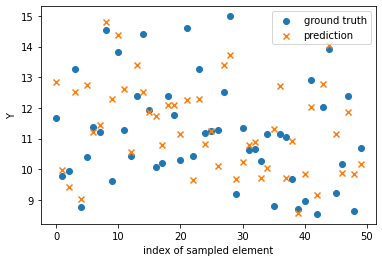

In [18]:
preds = lrm.predict(X_test.T)
lrm_test_results = print_results(preds, y_test.T, True)
plot_ground_truth_vs_preds(preds, y_test.T, "index of sampled element", "Y")

Mean Squared Error: 1.4344203706362455
R2 score: 0.49180364318579306


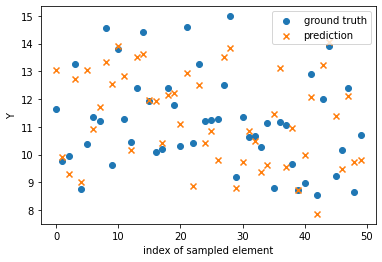

In [19]:
preds = lsvr.predict(X_test.T)
svr_test_results = print_results(preds, y_test.T, True)
plot_ground_truth_vs_preds(preds, y_test.T, "index of sampled element", "Y")

Mean Squared Error: 2.376774729212098
R2 score: 0.15793983194905103


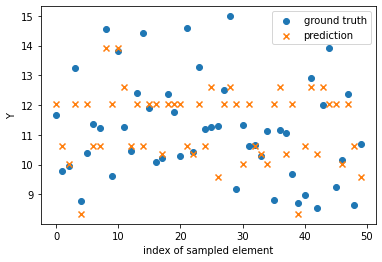

In [20]:
preds = ctree.predict(X_test.T)
tree_test_results = print_results(preds, y_test.T, True)
plot_ground_truth_vs_preds(preds, y_test.T, "index of sampled element", "Y")

$\mathbf{Exercise\, 3.}$ Plot the regression results (training and testing) for each model

In [21]:
def plot_results(train_data, test_data, title, show=False):
    """
    Reshapes result data in plotable data
    """
    if not show:
        d = {"mse":[train_data[0], test_data[0]]}
    else:
        d = {"mse":[train_data[0], test_data[0]], "r2": [train_data[1], test_data[1]]}
    d = pd.DataFrame(data=d, index=["train", "test"])
    d.plot(kind="bar",rot=1, subplots=True, title = title)

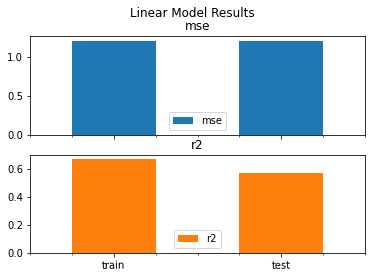

In [22]:
plot_results(lrm_train_results, lrm_test_results, "Linear Model Results", True)

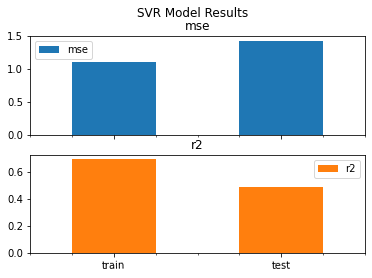

In [23]:
plot_results(svr_train_results, svr_test_results, "SVR Model Results", True)

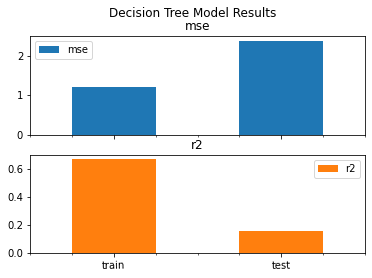

In [24]:
plot_results(tree_train_results, tree_test_results, "Decision Tree Model Results", True)

$\mathbf{Exercise\, 4.}$ Create a classification benchmark with 3 labels.

Evaluate training and testing prediction metrics for the following classification methods:

- K-nearest neighbours
- Random Forest
- Naive Bayes

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [26]:
def cluster_plot(X,y):
    """
    Reused cluster_plot function
    """
    n_input_dimensions = X.shape[1]
    n_output_dimensions = 1
    plt.figure(figsize=(50,50))
    fig, axes = plt.subplots(nrows = n_input_dimensions, ncols = n_input_dimensions,figsize=(10,10))
    labels = np.unique(y)
    for i in range(n_input_dimensions):
        for j in range(n_input_dimensions):           
            if i==j:
                X_lab = [X[np.where(y==c)[0],i] for c in labels]
                df = pd.DataFrame(X_lab)
                df = df.transpose()
                df.columns = [str(c) for c in labels]               
                df.plot(ax=axes[i,i], kind="kde")   
            else:
                axes[i,j].scatter(X[:,i],X[:,j], c = y, marker = 'o')
                axes[i,j].set(xlabel = 'X[' + str(i) + ']', ylabel = 'X[' + str(j) + ']')
    fig.tight_layout(h_pad=2)
    plt.show()

In [27]:
def print_scores(results, y_true, prediction):
    """
    Prints the accuracy, precision and recall scores of a model's prediction on a test set
    """
    print('-- sklearn metrics on the test set --\n')
    print('accuracy: ' + str(round(results,2)))
    print('precision: ' + str(round(precision_score(y_test, prediction, average="weighted"),2)))
    print('sensitivity: ' + str(round(recall_score(y_test, prediction, average="weighted"),2)))

In [28]:
X, y = make_classification(n_samples=150, 
                           weights=[0.5, 0.3], #class 0: 50% dataset, class 1: 30%, class 2: 20%
                           n_features=4, 
                           n_redundant=0, 
                           n_informative=4, 
                           n_clusters_per_class=1,
                           n_classes=3,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

kn_results = []
rf_results = []
nb_results = []

<Figure size 3600x3600 with 0 Axes>

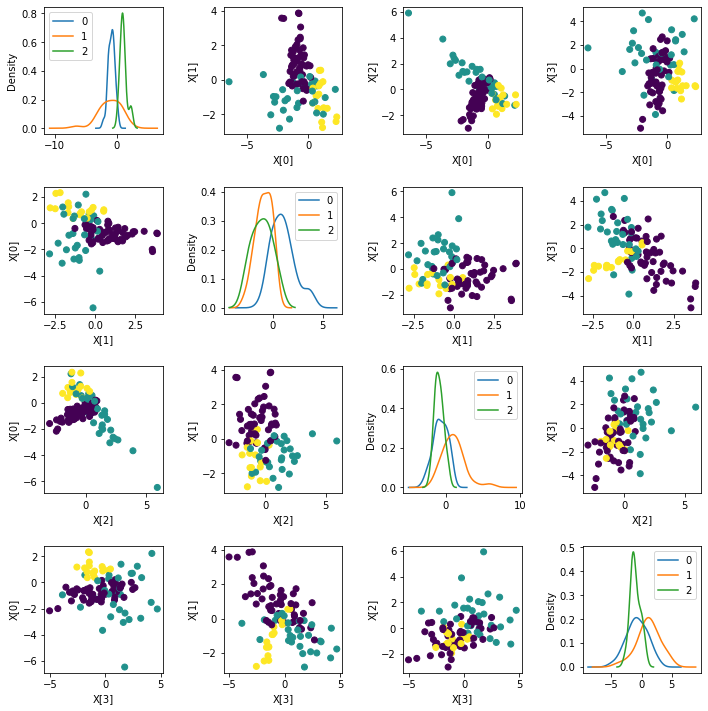

In [29]:
cluster_plot(X_train,y_train)

**K Neighbors Classifier**:

In [30]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
results = accuracy_score(neigh.predict(X_train), y_train)
kn_results.append(results)
results

0.94

In [31]:
results = accuracy_score(neigh.predict(X_test), y_test)
kn_results.append(results)
results

0.94

Summary performance metrics:

In [32]:
prediction = neigh.predict(X_test)

print_scores(results, y_test, prediction)

-- sklearn metrics on the test set --

accuracy: 0.94
precision: 0.94
sensitivity: 0.94


**Random Forest Classifier**:

In [33]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
results = accuracy_score(clf.predict(X_train), y_train)
rf_results.append(results)
results

0.99

In [34]:
results = accuracy_score(clf.predict(X_test), y_test)
rf_results.append(results)
results

0.9

Summary performance metrics:

In [35]:
prediction = neigh.predict(X_test)

print_scores(results, y_test, prediction)

-- sklearn metrics on the test set --

accuracy: 0.9
precision: 0.94
sensitivity: 0.94


**Naive Bayes Classifier**:

In [36]:
nb = GaussianNB()
nb.fit(X_train, y_train)
results = accuracy_score(nb.predict(X_train), y_train)
nb_results.append(results)
results

0.91

In [37]:
results = accuracy_score(nb.predict(X_test), y_test)
nb_results.append(results)
results

0.96

Summary performance metrics:

In [38]:
prediction = nb.predict(X_test)

print_scores(results, y_test, prediction)

-- sklearn metrics on the test set --

accuracy: 0.96
precision: 0.96
sensitivity: 0.96


In [39]:
def plot_classification_results(kn_results, rf_results, nb_results):
    """
    Plots the classification results
    """
    # data to plot
    n_groups = 2

    # create plot
    fig, ax = plt.subplots(figsize=(20,10))
    index = np.arange(n_groups)
    bar_width = 0.15
    opacity = 0.8

    kn = plt.bar(index - bar_width, 
                 kn_results, 
                 bar_width,
                 alpha=opacity,
                 color='r',
                 label='K Neighbors')

    rf = plt.bar(index, 
                 rf_results, 
                 bar_width,
                 alpha=opacity,
                 color='g',
                 label='Random Forest')

    nb = plt.bar(index + bar_width, 
                 nb_results, 
                 bar_width,
                 alpha=opacity,
                 color='b',
                 label='Naive Bayes')

    plt.xlabel('Scores', fontsize=30)
    plt.ylabel('Value', fontsize=30)
    plt.title('Accuracy scores by Models', fontsize=35)
    plt.xticks(index + bar_width, ('Train Set', 'Test Set'), fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(fontsize=25)
    plt.tight_layout()
    plt.show()

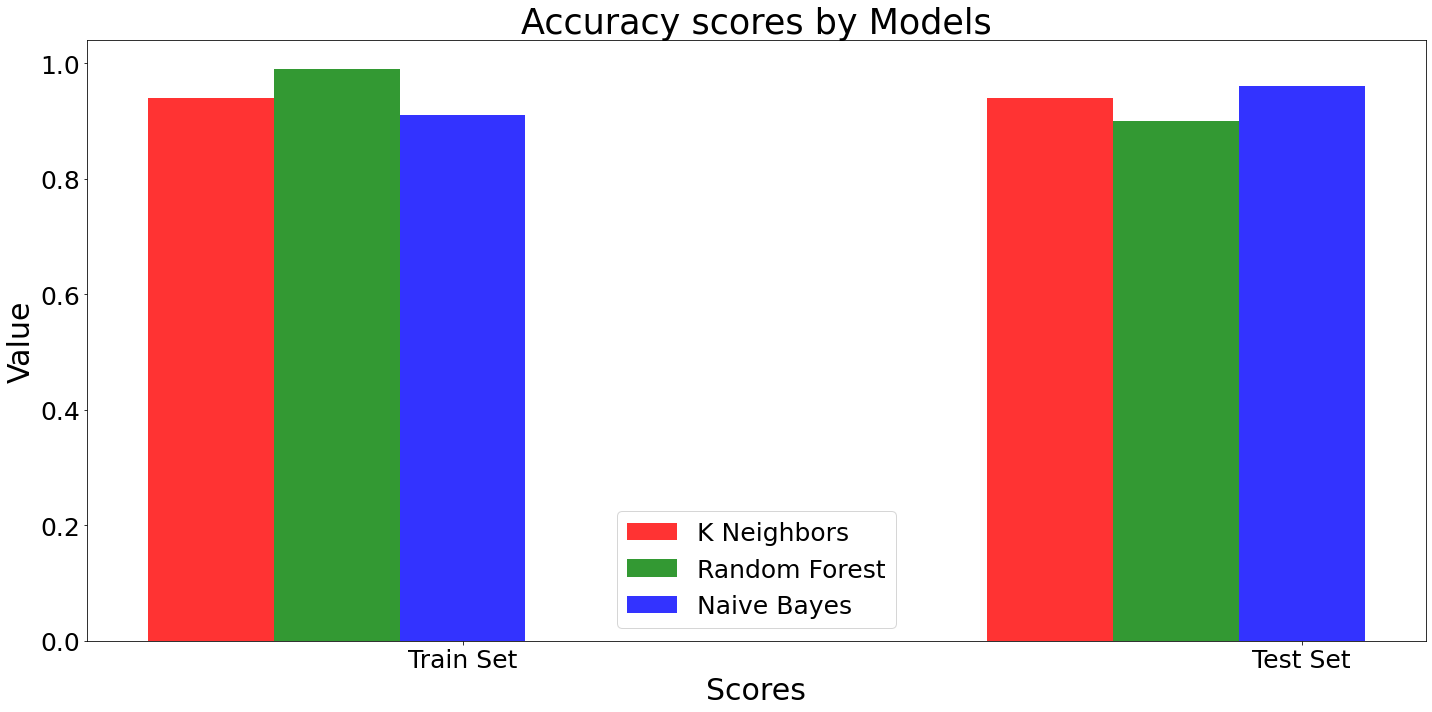

In [40]:
plot_classification_results(kn_results, rf_results, nb_results)

<hr>

<hr>

<hr>

## Application with real datasets

### Linear Benchmark with 2-dimensional input and 1-dimensional output

Create a linear benchmark, where the dimension of the input data $X$ is 2, and the dimension of the output data $y$ is 1. Choose the amount of noise and sample size.

Evaluate the prediction metrics for the following regression methods:

- Linear regression
- Support Vector Regression with RBF kernel
- Decision Tree Regression

<hr>

We are interested in predicting TDP (The watt-consumption) of Graphics Cards based on memory size, and memory clock.

**Original Source**: https://www.kaggle.com/iliassekkaf/computerparts

In [41]:
df = pd.read_csv("All_GPUs.csv")

df

,Architecture,Max_Power,Memory,Memory_Speed
0,R600 XT,215 Watts,512 MB,828 MHz
1,R600 PRO,200 Watts,512 MB,800 MHz
2,RV630,45 Watts,256 MB,700 MHz
3,RV630,50 Watts,256 MB,1100 MHz
4,R700 RV790 XT,190 Watts,2048 MB,1050 MHz
...,...,...,...,...
2239,Kepler GK208,19 Watts,2048 MB,900 MHz
2240,Fermi GF119-300-A1,30 Watts,1024 MB,898 MHz
2241,Kepler GK208,19 Watts,1024 MB,900 MHz
2242,Kepler GK208,25 Watts,2048 MB,900 MHz


In [42]:
remove_unit = lambda string: float(string.split(" ")[0])
df["Max_Power"]=df["Max_Power"].map(remove_unit)
df["Memory"]=df["Memory"].map(remove_unit)
df["Memory_Speed"]=df["Memory_Speed"].map(remove_unit)

df.rename(columns = {"Architecture":"Name",
                     "Max_Power":"max_power_watts", 
                     "Memory":"memory_mb", 
                     "Memory_Speed":"memory_speed_mhz"}, 
          inplace = True)

df

,Name,max_power_watts,memory_mb,memory_speed_mhz
0,R600 XT,215.0,512.0,828.0
1,R600 PRO,200.0,512.0,800.0
2,RV630,45.0,256.0,700.0
3,RV630,50.0,256.0,1100.0
4,R700 RV790 XT,190.0,2048.0,1050.0
...,...,...,...,...
2239,Kepler GK208,19.0,2048.0,900.0
2240,Fermi GF119-300-A1,30.0,1024.0,898.0
2241,Kepler GK208,19.0,1024.0,900.0
2242,Kepler GK208,25.0,2048.0,900.0


In [43]:
X = df[["memory_mb", "memory_speed_mhz"]]
y = df["max_power_watts"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [44]:
# Linear Regression
linear_regression_model = LinearRegression()
# Fits the model
lrm = linear_regression_model.fit(X_train, y_train)
# Predicts on train data
preds = lrm.predict(X_train)
# Accuracy
lrm_train_results = print_results(preds, y_train)

Mean Squared Error: 7600.6099390653235


In [45]:
# Linear SVR
linear_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Fits the model
lsvr = linear_svr.fit(X_train, y_train)
# Predicts on train data
preds = lsvr.predict(X_train)
# Accuracy
svr_train_results = print_results(preds, y_train)

Mean Squared Error: 3024.7294428298474


In [46]:
# Decision Tree
tree = DecisionTreeRegressor(max_depth=3)
# Fits the model
ctree = tree.fit(X_train, y_train)
# Predicts on train data
preds = ctree.predict(X_train)
# Accuracy
tree_train_results = print_results(preds, y_train)

Mean Squared Error: 5814.855079041651


$\mathbf{Exercise\, 2.}$ Create a testing dataset and assess the testing metrics for the models.

Mean Squared Error: 7911.125541552783
Showing only the first 100 items


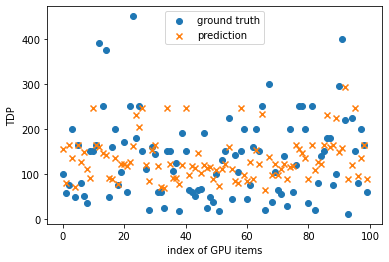

In [47]:
preds = lrm.predict(X_test)
lrm_test_results = print_results(preds, y_test)
plot_ground_truth_vs_preds(preds, y_test, "index of GPU items", "TDP", 100)

Mean Squared Error: 5587.534839203713
Showing only the first 100 items


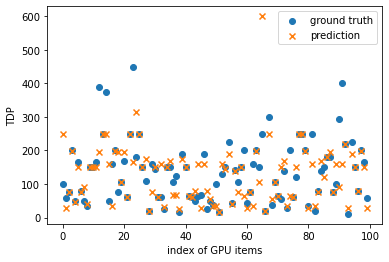

In [48]:
preds = lsvr.predict(X_test)
svr_test_results = print_results(preds, y_test)
plot_ground_truth_vs_preds(preds, y_test, "index of GPU items", "TDP", 100)

Mean Squared Error: 6222.748389150808
Showing only the first 100 items


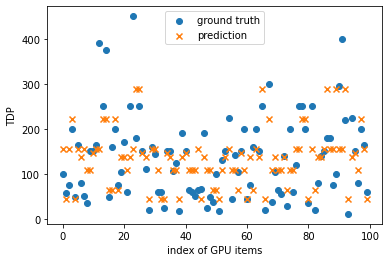

In [49]:
preds = ctree.predict(X_test)
tree_test_results = print_results(preds, y_test)
plot_ground_truth_vs_preds(preds, y_test, "index of GPU items", "TDP", 100)

$\mathbf{Exercise\, 3.}$ Plot the regression results (training and testing) for each model

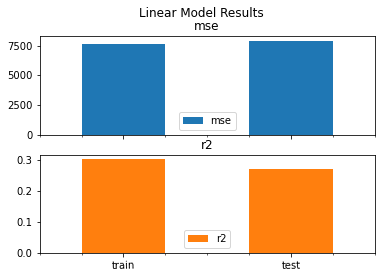

In [50]:
plot_results(lrm_train_results, lrm_test_results, "Linear Model Results", True)

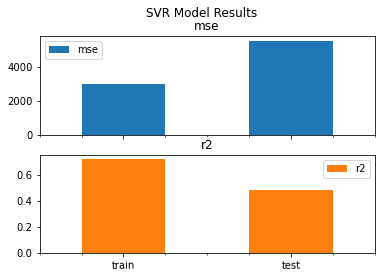

In [51]:
plot_results(svr_train_results, svr_test_results, "SVR Model Results", True)

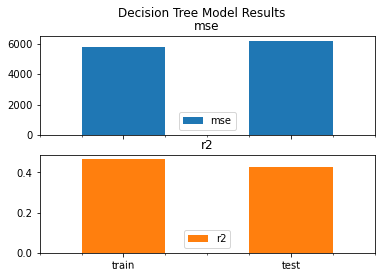

In [52]:
plot_results(tree_train_results, tree_test_results, "Decision Tree Model Results", True)

### Classification Benchmark

Evaluate training and testing prediction metrics for the following classification methods:

- K-nearest neighbours
- Random Forest
- Naive Bayes

<hr>

Using a similar dataset to the GPU ones, we are interested in another question: Can we classify intel CPU between number of cores (which come usually as 1 or in multiples of 2, i.e., 1, 2, 4, 6, etc.)?

In [53]:
df = pd.read_csv("Intel_CPUs.csv")
df

,Product_Collection,Lithography,nb_of_Cores,Processor_Base_Frequency,TDP
0,7th Generation Intel® Core™ i7 Processors,14 nm,2,1.30 GHz,4.5 W
1,8th Generation Intel® Core™ i5 Processors,14 nm,4,1.60 GHz,15 W
2,8th Generation Intel® Core™ i7 Processors,14 nm,4,1.80 GHz,15 W
3,Intel® Core™ X-series Processors,32 nm,4,3.60 GHz,130 W
4,7th Generation Intel® Core™ i5 Processors,14 nm,2,1.20 GHz,4.5 W
...,...,...,...,...,...
2155,6th Generation Intel® Core™ m Processors,14 nm,2,1.10 GHz,4.5 W
2156,6th Generation Intel® Core™ m Processors,14 nm,2,1.10 GHz,4.5 W
2157,6th Generation Intel® Core™ m Processors,14 nm,2,1.20 GHz,4.5 W
2158,5th Generation Intel® Core™ i7 Processors,14 nm,2,2.00 GHz,15 W


In [54]:
clock_unit_remove = lambda string: float(string.split(" ")[0]) if string.split(" ")[1] == "GHz" else float(string.split(" ")[0])/100

df["Lithography"]=df["Lithography"].map(remove_unit)
df["Processor_Base_Frequency"]=df["Processor_Base_Frequency"].map(clock_unit_remove)
df["TDP"]=df["TDP"].map(remove_unit)

df.rename(columns = {"Lithography":"transistor_size",
                     "nb_of_Cores":"core_nb", 
                     "Processor_Base_Frequency":"clock_speed_ghz"}, 
          inplace = True)
df

,Product_Collection,transistor_size,core_nb,clock_speed_ghz,TDP
0,7th Generation Intel® Core™ i7 Processors,14.0,2,1.3,4.5
1,8th Generation Intel® Core™ i5 Processors,14.0,4,1.6,15.0
2,8th Generation Intel® Core™ i7 Processors,14.0,4,1.8,15.0
3,Intel® Core™ X-series Processors,32.0,4,3.6,130.0
4,7th Generation Intel® Core™ i5 Processors,14.0,2,1.2,4.5
...,...,...,...,...,...
2155,6th Generation Intel® Core™ m Processors,14.0,2,1.1,4.5
2156,6th Generation Intel® Core™ m Processors,14.0,2,1.1,4.5
2157,6th Generation Intel® Core™ m Processors,14.0,2,1.2,4.5
2158,5th Generation Intel® Core™ i7 Processors,14.0,2,2.0,15.0


In [55]:
X = df[["transistor_size", "clock_speed_ghz", "TDP"]]
y = df["core_nb"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

kn_results = []
rf_results = []
nb_results = []

**K Neighbors Classifier**:

In [56]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
results = accuracy_score(neigh.predict(X_train), y_train)
kn_results.append(results)
results

0.8299930891499654

In [57]:
results = accuracy_score(neigh.predict(X_test), y_test)
kn_results.append(results)
results

0.782608695652174

Summary performance metrics:

In [58]:
prediction = neigh.predict(X_test)

print_scores(results, y_test, prediction)

-- sklearn metrics on the test set --

accuracy: 0.78
precision: 0.79
sensitivity: 0.78


**Random Forest Classifier**:

In [59]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
results = accuracy_score(clf.predict(X_train), y_train)
rf_results.append(results)
results

0.6530753282653766

In [60]:
results = accuracy_score(clf.predict(X_test), y_test)
rf_results.append(results)
results

0.664796633941094

Summary performance metrics:

In [61]:
prediction = clf.predict(X_test)

print_scores(results, y_test, prediction)

-- sklearn metrics on the test set --

accuracy: 0.66
precision: 0.6
sensitivity: 0.66


**Naive Bayes Classifier**:

In [62]:
nb = GaussianNB()
nb.fit(X_train, y_train)
results = accuracy_score(nb.predict(X_train), y_train)
nb_results.append(results)
results

0.6385625431928127

In [63]:
results = accuracy_score(nb.predict(X_test), y_test)
nb_results.append(results)
results

0.6269284712482468

Summary performance metrics:

In [64]:
prediction = nb.predict(X_test)

print_scores(results, y_test, prediction)

-- sklearn metrics on the test set --

accuracy: 0.63
precision: 0.61
sensitivity: 0.63


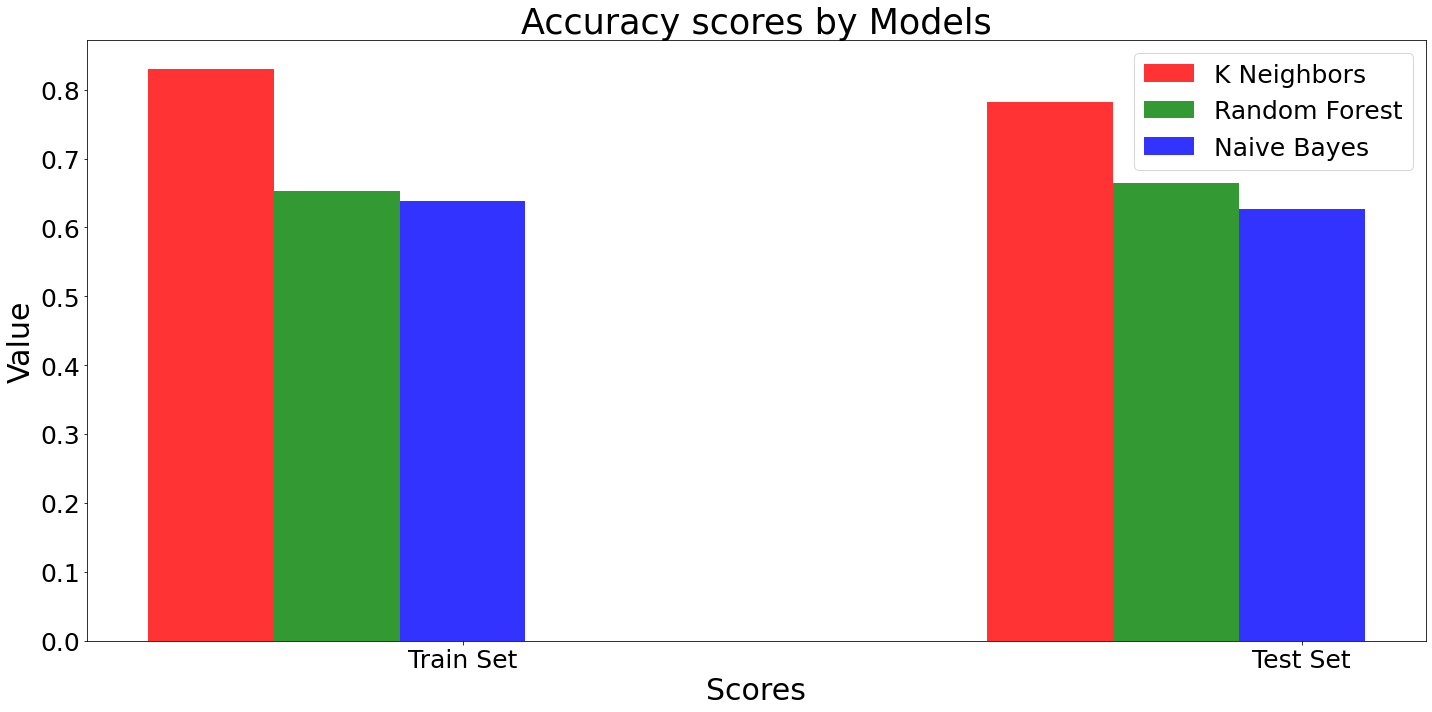

In [65]:
plot_classification_results(kn_results, rf_results, nb_results)